## tensorflow.kerasでニューラルネットワーク

## ライブラリのimport

In [16]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


## データセットのダウンロード

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

クラス名をセットしておく

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

データのサイズを確認

In [19]:
train_images.shape

(60000, 28, 28)

In [20]:
len(train_labels)

60000

In [21]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
test_images.shape

(10000, 28, 28)

In [23]:
len(test_labels)

10000

## データの前処理

 データを確認


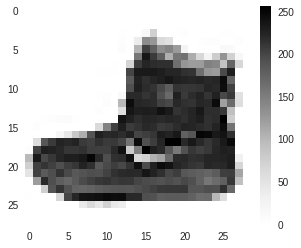

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

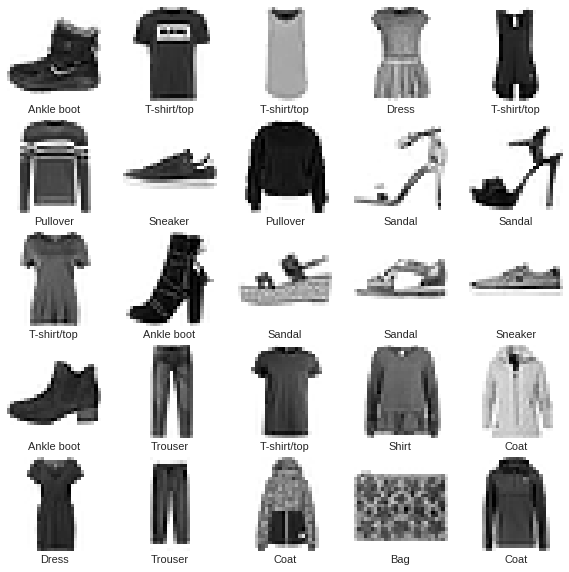

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## 機械学習モデルの作成

### モデルの定義

### モデルの定義

In [0]:
### モデルの定義

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),      # 入力層（向けの変換）：28x28の行列を784要素の一次元行列に変換
    keras.layers.Dense(128, activation=tf.nn.relu),  # 中間層：784→128の全結合層、活性化関数にreluを指定
    keras.layers.Dense(10, activation=tf.nn.softmax) # 出力層：128→10の全結合層、クラス分類なので活性化関数にsoftmax
])

### モデルのコンパイル

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),     # Adamオプティマイザで学習
              loss='sparse_categorical_crossentropy', # 損失関数にカテゴリカルクロスエントロピー
              metrics=['accuracy'])                   # トレーニングとテストの監視に使用

### モデルの学習

In [30]:
model.fit(train_images, train_labels, epochs=5)       # モデルを学習。教師データ、教師ラベル、エポック数

Epoch 1/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.5020 - acc: 0.8248
Epoch 2/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.3758 - acc: 0.8656
Epoch 3/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.3412 - acc: 0.8762
Epoch 4/5
47904/60000 [======================>.......] - ETA: 1s - loss: 0.3142 - acc: 0.8856

60000/60000 [==============================] - 6s 96us/step - loss: 0.3136 - acc: 0.8857
Epoch 5/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.2978 - acc: 0.8898


### 学習済みモデルの精度をテストデータで確認

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)  # 精度を確認

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/step
Test accuracy: 0.8712


In [0]:
predictions = model.predict(test_images) # 予測

In [33]:
predictions[0]

array([3.32111595e-05, 7.02369164e-07, 3.85386983e-07, 3.63544672e-07,
       1.57147642e-05, 2.70020552e-02, 8.17301498e-06, 7.00729787e-02,
       1.13245085e-04, 9.02753234e-01], dtype=float32)

In [34]:
np.argmax(predictions[0]), test_labels[0]

(9, 9)

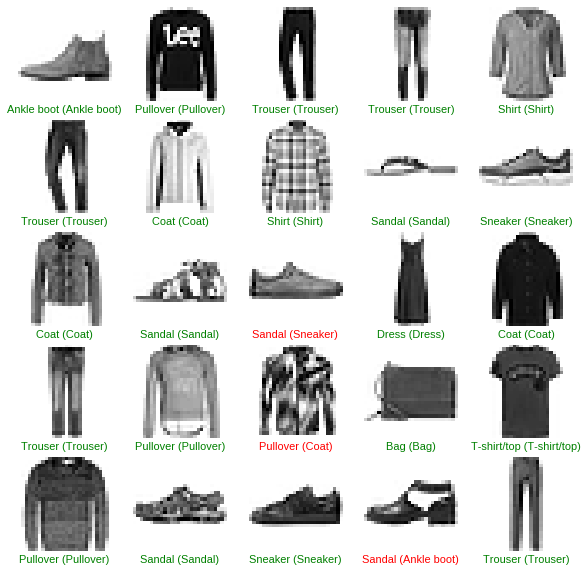

In [35]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      